In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
training_set = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
training_set.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
training_set = training_set.iloc[:,1:2].values

#### Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
sc = MinMaxScaler(feature_range = (0, 1))

In [7]:
training_set_scaled = sc.fit_transform(training_set)

#### Getting Inputs & Outputs

In [8]:
training_set.shape

(1258, 1)

In [9]:
training_set

array([[ 325.25],
       [ 331.27],
       [ 329.83],
       ..., 
       [ 793.7 ],
       [ 783.33],
       [ 782.75]])

In [10]:
X_train = []
y_train = []
for i in range(20,1258):
    X_train.append(training_set_scaled[i-20:i,0])
    y_train.append(training_set_scaled[i,0])
    

In [11]:
X_train,y_train = np.array(X_train),np.array(y_train)

In [12]:
X_train.shape

(1238, 20)

#### Reshaping

In [13]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

#### Building the RNN

In [14]:
from keras.models import Sequential
from keras.layers import LSTM,Dense

Using TensorFlow backend.


In [15]:
regressor = Sequential()

In [16]:
regressor.add(LSTM(units=3,activation='sigmoid',input_shape=(None,1)))

In [17]:
regressor.add(Dense(units=1))

In [18]:
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')

In [19]:
regressor.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
1238/1238 [==============================] - 1s 1ms/step - loss: 1.4468
Epoch 2/100
1238/1238 [==============================] - 1s 572us/step - loss: 1.1732
Epoch 3/100
1238/1238 [==============================] - 1s 574us/step - loss: 0.9581
Epoch 4/100
1238/1238 [==============================] - 1s 570us/step - loss: 0.7799
Epoch 5/100
1238/1238 [==============================] - 1s 576us/step - loss: 0.6321
Epoch 6/100
1238/1238 [==============================] - 1s 571us/step - loss: 0.5084
Epoch 7/100
1238/1238 [==============================] - 1s 572us/step - loss: 0.4061
Epoch 8/100
1238/1238 [==============================] - 1s 571us/step - loss: 0.3221
Epoch 9/100
1238/1238 [==============================] - 1s 558us/step - loss: 0.2535
Epoch 10/100
1238/1238 [==============================] - 1s 551us/step - loss: 0.1981
Epoch 11/100
1238/1238 [==============================] - 1s 576us/step - loss: 0.1552
Epoch 12/100
1238/1238 [==============================

1238/1238 [==============================] - 1s 597us/step - loss: 2.5408e-04
Epoch 93/100
1238/1238 [==============================] - 1s 600us/step - loss: 2.5317e-04
Epoch 94/100
1238/1238 [==============================] - 1s 611us/step - loss: 2.5409e-04
Epoch 95/100
1238/1238 [==============================] - 1s 601us/step - loss: 2.5492e-04
Epoch 96/100
1238/1238 [==============================] - 1s 593us/step - loss: 2.5382e-04
Epoch 97/100
1238/1238 [==============================] - 1s 599us/step - loss: 2.5060e-04
Epoch 98/100
1238/1238 [==============================] - 1s 585us/step - loss: 2.5416e-04
Epoch 99/100
1238/1238 [==============================] - 1s 583us/step - loss: 2.5371e-04
Epoch 100/100
1238/1238 [==============================] - 1s 599us/step - loss: 2.5507e-04


### Making Predictions

#### Getting Real Stock Prices for Feb 1st 2012 - Jan 31st 2017 

In [20]:
test_set = pd.read_csv('Google_Stock_Price_Test.csv')

In [21]:
test_set = test_set.iloc[:,1:2].values

In [22]:
real_stock_price = np.concatenate((training_set[0:1258], test_set), axis = 0)

In [23]:
real_stock_price.shape

(1278, 1)

####  Getting the predicted stock price of 2017

In [24]:
scaled_real_stock_price = sc.fit_transform(real_stock_price)

In [25]:
inputs = []
for i in range(1258,1278):
    inputs.append(scaled_real_stock_price[i-20:i,0])

In [26]:
inputs = np.array(inputs)

In [27]:
inputs.shape

(20, 20)

In [28]:
inputs = np.reshape(inputs,(inputs.shape[0],inputs.shape[1],1))

In [29]:
predicted_stock_price = regressor.predict(inputs)

In [30]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the Results

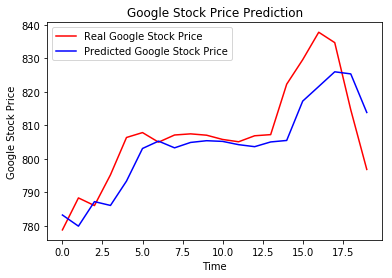

In [31]:
plt.plot(real_stock_price[1258:],color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

### Evaluating the RNN

In [32]:
import math
from sklearn.metrics import mean_squared_error

In [33]:
rmse = math.sqrt(mean_squared_error(real_stock_price[1258:],predicted_stock_price))

In [36]:
np.average(real_stock_price[1258:])

807.52600000000007

In [37]:
error_percentage = (rmse/807)*100

In [38]:
error_percentage

1.1030300347818087